# No 1

In [ ]:
import numpy as np  
import pandas as pd  
import io
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [ ]:
print("Dipilih nilai dari: ")
S0 = 915
print("S0 = ", S0)
Miu = 0.045
print("Miu = ", Miu)
Sigma = 0.15
print("Sigma (Tidak boleh diatas 50%) = ", Sigma)
print("Dipilih T = 4 tahun dengan tiap tahun dibagi menjadi 250 unit waktu")
T_1 = 4
n_1 = 250*T_1
delta_T_1 = T_1/n_1
print("delta_T = ", delta_T_1)

Dipilih nilai dari: 
S0 =  915
Miu =  0.045
Sigma (Tidak boleh diatas 50%) =  0.15
Dipilih T = 4 tahun dengan tiap tahun dibagi menjadi 250 unit waktu
delta_T =  0.004


In [ ]:
data1 = pd.read_csv("No1.csv")
data1 = data1[["Hrg shm pd wkt (masa mendatang)","Hrg"]]
No1 = data1.set_index('Hrg shm pd wkt (masa mendatang)')
No1.head()

,Hrg
Hrg shm pd wkt (masa mendatang),
S_0,915.000000
S_1,914.908343
S_2,913.598966
S_3,914.293321
S_4,921.129416


In [ ]:
No1.tail()

,Hrg
Hrg shm pd wkt (masa mendatang),
S_996,940.486050
S_997,945.621401
S_998,945.078063
S_999,940.149297
S_1000,933.935975


## 1b

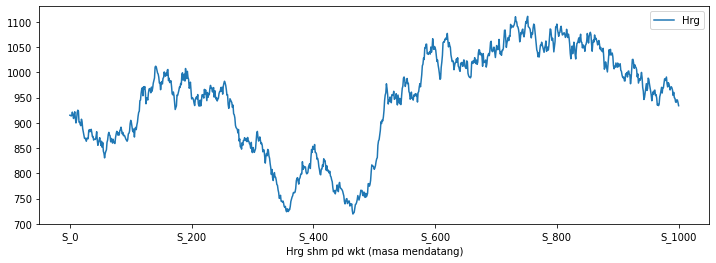

In [ ]:
No1.plot(figsize = (12,4))
hrg_shm_thdp_wkt_1 = plt.show()

## 1c

### Daily Return

In [ ]:
return_daily_1 = No1.pct_change().dropna()
return_daily_1 = return_daily_1.rename({'Hrg':'Daily Return'}, axis=1)
return_daily_1.head()

,Daily Return
Hrg shm pd wkt (masa mendatang),
S_1,-0.000100
S_2,-0.001431
S_3,0.000760
S_4,0.007477
S_5,-0.005523


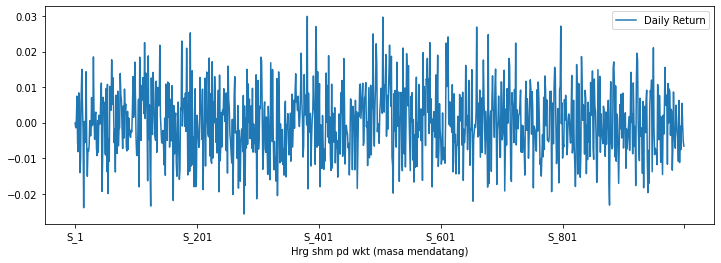

In [ ]:
return_daily_1.plot(figsize = (12,4))
plt.show()

### Daily Log Return

In [ ]:
No1['Log Return'] = np.log(No1['Hrg']).diff()
No1

,Hrg,Log Return
Hrg shm pd wkt (masa mendatang),,
S_0,915.000000,NaN
S_1,914.908343,-0.000100
S_2,913.598966,-0.001432
S_3,914.293321,0.000760
S_4,921.129416,0.007449
...,...,...
S_996,940.486050,-0.001023
S_997,945.621401,0.005445
S_998,945.078063,-0.000575


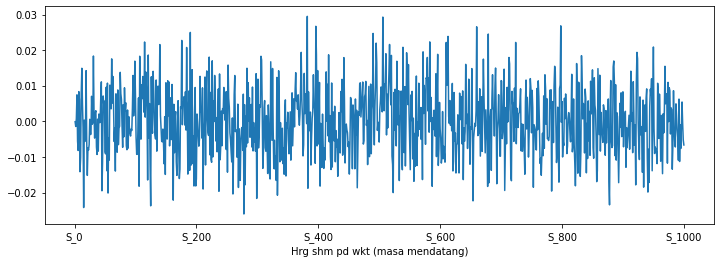

In [ ]:
No1['Log Return'].plot(figsize = (12,4))
daily_log_return_1 = plt.show()

## 1e

In [ ]:
mean_teoritis_1 = (Miu-(((Sigma*Sigma)/2)))*T_1
print("Mean Teoritis:", mean_teoritis_1)

Mean Teoritis: 0.135


In [ ]:
u_1 = return_daily_1.mean()
print("Mean Empirik (daily return):", u_1)

Mean Empirik (daily return): Daily Return    0.000066
dtype: float64


In [ ]:
u_log1 = No1['Log Return'].mean()
print("Mean Empirik (daily log return):", u_log1)

Mean Empirik (daily log return): 2.0483821353178833e-05


In [ ]:
var_teoritis_1 = (Sigma*Sigma)*T_1
print("Var Teoritis:", var_teoritis_1)

Var Teoritis: 0.09


In [ ]:
var_1 = return_daily_1.var()
print("Var Empirik (daily return):", var_1)

Var Empirik (daily return): Daily Return    0.000091
dtype: float64


In [ ]:
var_log1 = No1['Log Return'].var()
print("Var Empirik (daily log return):", var_log1)

Var Empirik (daily log return): 9.115749319135314e-05


In [ ]:
drift_1 = u_1 - (0.5 * var_1)
drift_1

Daily Return    0.00002
dtype: float64

In [ ]:
drift_log1 = u_log1 - (0.5 * var_log1)
drift_log1

-2.5094925242497734e-05

In [ ]:
stdev_1 = return_daily_1.std()
stdev_1

Daily Return    0.009554
dtype: float64

In [ ]:
stdev_log1 = No1['Log Return'].std()
stdev_log1

0.009547643331804615

## 1a

In [ ]:
iteration_1 = 1

In [ ]:
return_daily_1a = np.exp(drift_1.values + stdev_1.values * norm.ppf(np.random.rand(n_1,iteration_1)))
return_daily_1a = np.array(return_daily_1a)
return_daily_1a

array([[1.0144662 ],
       [1.00793097],
       [1.00335578],
       [1.01550761],
       [0.99937971],
       [1.01177773],
       [0.99516328],
       [1.02071835],
       [0.99031199],
       [0.98810568],
       [0.99457781],
       [1.00828818],
       [1.01169055],
       [0.97900341],
       [1.00633771],
       [0.99619944],
       [0.99611773],
       [1.02108901],
       [1.00514918],
       [0.99119937],
       [1.00096063],
       [1.00431525],
       [1.00853466],
       [1.00431131],
       [0.98394894],
       [0.98828873],
       [0.99194936],
       [0.99697091],
       [0.99366616],
       [0.98498229],
       [1.00145241],
       [0.99838612],
       [0.99772242],
       [0.98416426],
       [0.99545151],
       [1.00640031],
       [0.98162069],
       [0.98875733],
       [1.00819149],
       [1.01160643],
       [1.01195942],
       [0.97740556],
       [0.98770866],
       [0.97934195],
       [1.00406926],
       [0.9929527 ],
       [0.99338312],
       [0.995

In [ ]:
S_1 = data1.iloc[-1:,-1]
S_1

1000    933.935975
Name: Hrg, dtype: float64

In [ ]:
price_list_1 = np.zeros_like(return_daily_1a)
price_list_1 = np.array(price_list_1)
price_list_1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
price_list_1[0] = S_1
price_list_1

array([[933.935975],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0. 

In [ ]:
for t_1 in range(1, n_1):
    price_list_1[t_1] = price_list_1[t_1 - 1] * return_daily_1a[t_1]

In [ ]:
price_list_1

array([[ 933.935975  ],
       [ 941.3429974 ],
       [ 944.5019381 ],
       [ 959.14890175],
       [ 958.55395347],
       [ 969.84353877],
       [ 965.15268107],
       [ 985.14905618],
       [ 975.6049245 ],
       [ 964.00076886],
       [ 958.77377025],
       [ 966.72026297],
       [ 978.0217538 ],
       [ 957.48663628],
       [ 963.55491226],
       [ 959.89286523],
       [ 956.16630391],
       [ 976.33090097],
       [ 981.35820686],
       [ 972.72163941],
       [ 973.65606981],
       [ 977.85764162],
       [ 986.20332673],
       [ 990.45515592],
       [ 974.55730559],
       [ 963.1439996 ],
       [ 955.3900778 ],
       [ 952.49611621],
       [ 946.46315611],
       [ 932.24944728],
       [ 933.6034597 ],
       [ 932.09673732],
       [ 929.97380785],
       [ 915.24698011],
       [ 911.08398435],
       [ 916.91520875],
       [ 900.06294437],
       [ 889.94383105],
       [ 897.23380132],
       [ 907.64747935],
       [ 918.50241259],
       [ 897.749

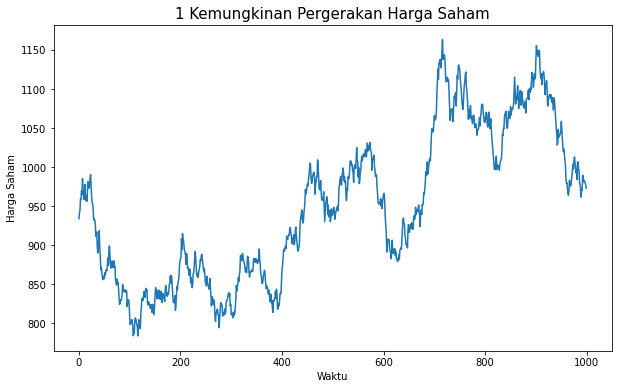

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_list_1)
plt.title("1 Kemungkinan Pergerakan Harga Saham", fontsize = 15)
plt.ylabel("Harga Saham", fontsize = 10)
plt.xlabel("Waktu", fontsize = 10)
plt.show()

## 1d

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


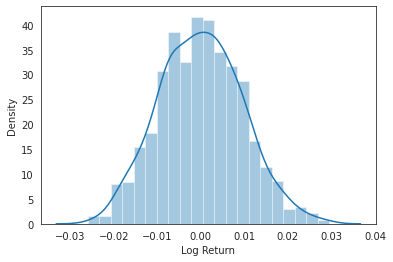

In [ ]:
sns.distplot(No1['Log Return']

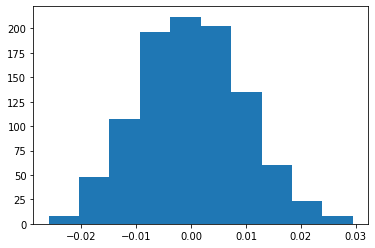

In [ ]:
hist_1 = plt.hist(No1['Log Return'])

# No 2

In [142]:
import numpy as np  
import pandas as pd  
import io
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [143]:
print("Dipilih nilai dari: ")
S0 = 915
print("S0 = ", S0)
Miu = 0.045
print("Miu = ", Miu)
Sigma = 0.15
print("Sigma (Tidak boleh diatas 50%) = ", Sigma)
print("Dipilih T = 4 tahun dengan tiap tahun dibagi menjadi 250 unit waktu")
T_2 = 1
n_2 = 250*T_2
delta_T_2 = T_2/n_2
print("delta_T = ", delta_T_2)

Dipilih nilai dari: 
S0 =  915
Miu =  0.045
Sigma (Tidak boleh diatas 50%) =  0.15
Dipilih T = 4 tahun dengan tiap tahun dibagi menjadi 250 unit waktu
delta_T =  0.004


In [144]:
data2 = pd.read_csv("No2.csv")
data2 = data2[["Hrg shm pd wkt (masa mendatang)","Hrg"]]
No2 = data2.set_index('Hrg shm pd wkt (masa mendatang)')
No2.head()

,Hrg
Hrg shm pd wkt (masa mendatang),
S_0,915.000000
S_1,914.908343
S_2,913.598966
S_3,914.293321
S_4,921.129416


In [145]:
No2.tail()

,Hrg
Hrg shm pd wkt (masa mendatang),
S_246,961.763856
S_247,962.088431
S_248,970.051644
S_249,962.424545
S_250,970.500400


## 2b

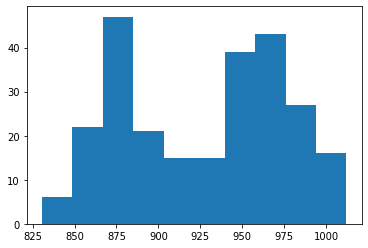

In [146]:
hist_2 = plt.hist(No2['Hrg'])

## 2c

In [147]:
No2['Log Harga'] = np.log(No2['Hrg']).diff()
No2

,Hrg,Log Harga
Hrg shm pd wkt (masa mendatang),,
S_0,915.000000,NaN
S_1,914.908343,-0.000100
S_2,913.598966,-0.001432
S_3,914.293321,0.000760
S_4,921.129416,0.007449
...,...,...
S_246,961.763856,0.004031
S_247,962.088431,0.000337
S_248,970.051644,0.008243


In [148]:
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


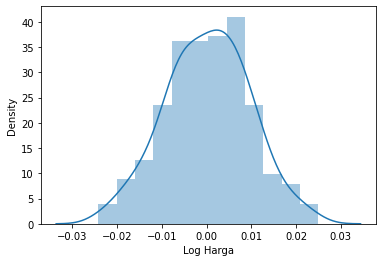

In [149]:
sns.distplot(No2['Log Harga'])

Daily Return

In [159]:
return_daily_2 = No2.pct_change().dropna()
return_daily_2 = return_daily_2.rename({'Hrg':'Daily Return'}, axis=1)
return_daily_2 = return_daily_2[["Daily Return"]]
return_daily_2.head()

,Daily Return
Hrg shm pd wkt (masa mendatang),
S_2,-0.001431
S_3,0.000760
S_4,0.007477
S_5,-0.005523
S_6,-0.008146


In [160]:
mean_teoritis_2 = (Miu-(((Sigma*Sigma)/2)))*T_2
print("Mean Teoritis:", mean_teoritis_2)

Mean Teoritis: 0.03375


In [161]:
u_log2 = No2['Log Harga'].mean()
print("Mean Empirik (log harga saham):", u_log2)

Mean Empirik (log harga saham): 0.00023555099879287768


In [162]:
var_teoritis_2 = (Sigma*Sigma)*T_2
print("Var Teoritis:", var_teoritis_2)

Var Teoritis: 0.0225


In [163]:
var_log2 = No2['Log Harga'].var()
print("Var Empirik (log harga saham):", var_log2)

Var Empirik (log harga saham): 9.002734657591212e-05


In [179]:
drift_2 = u_log2 - (0.5 * var_teoritis_2)
drift_2

-0.011014449001207122

In [180]:
stdev_2 = return_daily_2.std()
stdev_2

Daily Return    0.009508
dtype: float64

In [166]:
stdev_log2 = No2['Log Harga'].std()
stdev_log2

0.009488274162138871

## 2a

In [167]:
iteration_2 = 10000

In [183]:
return_daily_2a = np.exp(-0.011014449001207122 + 0.009508 * norm.ppf(np.random.rand(n_2,iteration_2)))
return_daily_2a = np.array(return_daily_2a)
return_daily_2a

array([[0.97239933, 0.98643967, 0.98172735, ..., 0.96006609, 0.98983474,
        0.9807196 ],
       [0.9947269 , 0.96816886, 1.0017258 , ..., 0.98163225, 0.9877441 ,
        1.00185351],
       [0.9849446 , 0.99116693, 0.98230672, ..., 0.99507363, 0.99420507,
        0.97849497],
       ...,
       [0.99130345, 1.00097899, 0.99852766, ..., 0.99297903, 0.99323667,
        0.99956989],
       [0.98887081, 1.00770948, 0.9947671 , ..., 0.98539343, 0.96703045,
        0.98934805],
       [0.99373931, 0.97752293, 0.99278446, ..., 0.99392165, 0.98279464,
        0.98491736]])

In [185]:
S2 = data2.iloc[-1]
S2

Hrg shm pd wkt (masa mendatang)    S_250
Hrg                                970.5
Name: 250, dtype: object

In [186]:
price_list_2 = np.zeros_like(return_daily_2a)
price_list_2 = np.array(price_list_2)
price_list_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [187]:
price_list_2[0] = S_2
price_list_2

array([[970.5004002, 970.5004002, 970.5004002, ..., 970.5004002,
        970.5004002, 970.5004002],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [188]:
for t_2 in range(1, n_2):
    price_list_2[t_2] = price_list_2[t_2 - 1] * return_daily_2a[t_2]

In [189]:
price_list_2

array([[970.5004002 , 970.5004002 , 970.5004002 , ..., 970.5004002 ,
        970.5004002 , 970.5004002 ],
       [965.38285075, 939.60826693, 972.17528684, ..., 952.67449527,
        958.60604354, 972.2992354 ],
       [950.84862163, 931.30864149, 954.97431603, ..., 947.98126448,
        953.05098492, 951.3899085 ],
       ...,
       [ 86.4299455 ,  66.0546957 ,  67.14259427, ...,  59.50300912,
         81.08013636,  53.76131605],
       [ 85.46804986,  66.56394279,  66.79124389, ...,  58.63387403,
         78.40696082,  53.18865326],
       [ 84.93296066,  65.06778024,  66.30930919, ...,  58.27747695,
         77.05794062,  52.38642813]])

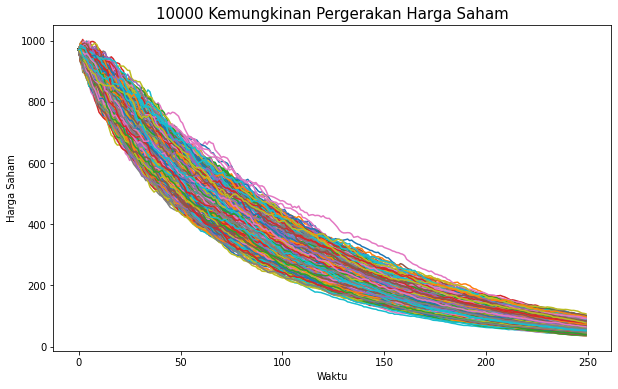

In [190]:
plt.figure(figsize=(10,6))
plt.plot(price_list_2)
plt.title("10000 Kemungkinan Pergerakan Harga Saham", fontsize = 15)
plt.ylabel("Harga Saham", fontsize = 10)
plt.xlabel("Waktu", fontsize = 10)
plt.show()

# No 3

In [131]:
import numpy as np  
import pandas as pd
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [132]:
data = pd.read_csv("SIDO.JK.csv")
data = data[["Date","Adj Close"]]
SIDO = data.set_index('Date')
SIDO.head()

,Adj Close
Date,
28/11/2016,207.139099
29/11/2016,209.039490
30/11/2016,207.139099
01/12/2016,209.039490
02/12/2016,209.039490


In [133]:
SIDO.tail()

,Adj Close
Date,
22/11/2021,930.0
23/11/2021,930.0
24/11/2021,925.0
25/11/2021,915.0
26/11/2021,915.0


## 3a

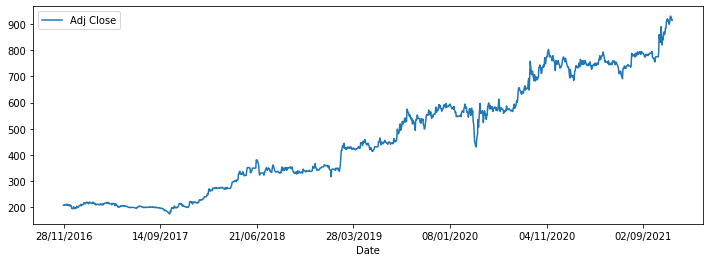

In [134]:
SIDO.plot(figsize = (12,4))
hrg_shm_thdp_wkt = plt.show()

## 3b

### Daily Return

In [135]:
return_daily = SIDO.pct_change().dropna()
return_daily = return_daily.rename({'Adj Close':'Return Daily'}, axis=1)
return_daily.head()

,Return Daily
Date,
29/11/2016,0.009174
30/11/2016,-0.009091
01/12/2016,0.009174
02/12/2016,0.000000
05/12/2016,0.009091


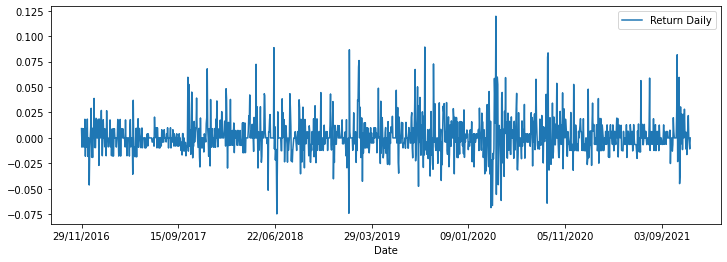

In [136]:
return_daily.plot(figsize = (12,4))
plt.show()

### Daily Log Return

In [137]:
SIDO['Log Return'] = np.log(SIDO['Adj Close']).diff()
SIDO

,Adj Close,Log Return
Date,,
28/11/2016,207.139099,NaN
29/11/2016,209.039490,0.009133
30/11/2016,207.139099,-0.009133
01/12/2016,209.039490,0.009133
02/12/2016,209.039490,0.000000
...,...,...
22/11/2021,930.000000,0.021740
23/11/2021,930.000000,0.000000
24/11/2021,925.000000,-0.005391


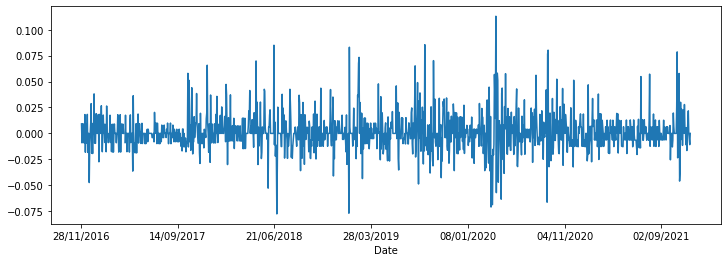

In [138]:
SIDO['Log Return'].plot(figsize = (12,4))
hrg_shm_thdp_wkt_graph = plt.show()

## 3c

Gambar Histogram Daily Log Return

In [139]:
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


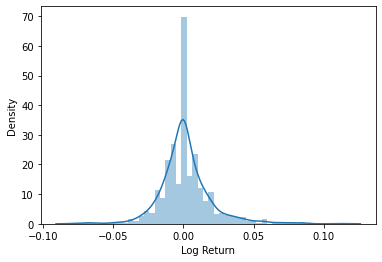

In [141]:
sns.distplot(SIDO['Log Return'])

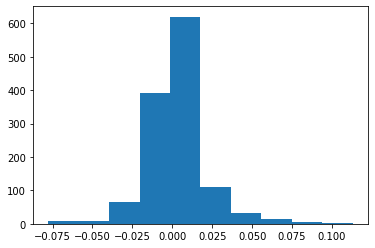

In [140]:
hrg_shm_thdp_wkt_hist = plt.hist(SIDO['Log Return'])